In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
pd.options.display.float_format = '{:20.2f}'.format

## Data Exploration

In [ ]:
df = pd.read_csv('online_retail - Year 2009-2010.csv')
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/2009 7:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,12/1/2009 7:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/2009 7:46:00,3.75,13085.00,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,525461.00,525461.00,417534.00
mean,10.34,4.69,15360.65
std,107.42,146.13,1680.81
min,-9600.00,-53594.36,12346.00
25%,1.00,1.25,13983.00
50%,3.00,2.10,15311.00
75%,10.00,4.21,16799.00
max,19152.00,25111.09,18287.00


In [ ]:
df.describe(include='object')

,Invoice,StockCode,Description,InvoiceDate,Country
count,525461,525461,522533,525461,525461
unique,28816,4632,4681,25296,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/6/2010 16:57:00,United Kingdom
freq,675,3516,3549,675,485852


In [ ]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,12/1/2009 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,12/1/2009 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,12/1/2009 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,12/1/2009 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,12/1/2009 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,12/1/2009 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,12/1/2009 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,12/1/2009 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,12/1/2009 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,12/1/2009 12:32:00,1.65,NaN,United Kingdom


In [ ]:
df[df['Quantity'] <= 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,12/1/2009 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,12/1/2009 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,12/1/2009 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,12/1/2009 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,12/1/2009 10:44:00,4.25,17592.00,United Kingdom


In [ ]:
df["Invoice"] = df["Invoice"].astype(str)
df[df['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,12/9/2010 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,12/9/2010 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,12/9/2010 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,12/9/2010 15:43:00,12.75,15329.00,United Kingdom


In [ ]:
df["Invoice"] = df["Invoice"].astype(str)
df[df['Invoice'].str.match("^C") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,12/9/2010 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,12/9/2010 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,12/9/2010 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,12/9/2010 15:43:00,12.75,15329.00,United Kingdom


In [ ]:
df['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [ ]:
df[df['Invoice'].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,4/29/2010 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,7/19/2010 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,10/20/2010 12:04:00,-38925.87,NaN,United Kingdom


In [ ]:
df['StockCode'] = df['StockCode'].astype("str")
df[df['StockCode'].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,12/1/2009 9:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,12/1/2009 9:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,12/1/2009 9:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,12/9/2010 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,12/9/2010 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,12/9/2010 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,12/9/2010 20:01:00,1.95,17530.00,United Kingdom


In [ ]:
df['StockCode'] = df['StockCode'].astype("str")
df[
    (df['StockCode'].str.match("^\\d{5}$") == False) &
     (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)
  ]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [ ]:
df[df["StockCode"].str.contains("47503J")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2981,489642,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,12/1/2009 16:19:00,7.95,NaN,United Kingdom
9784,490149,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,12/4/2009 9:43:00,16.48,NaN,United Kingdom
15894,490711,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,12/7/2009 15:26:00,7.95,17841.00,United Kingdom
20061,491041,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,12/9/2009 9:42:00,16.48,NaN,United Kingdom
24867,C491446,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,-7,12/11/2009 10:47:00,7.95,14191.00,United Kingdom
...,...,...,...,...,...,...,...,...
356535,524004,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,9/26/2010 16:06:00,7.95,15532.00,United Kingdom
496010,535803,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,6,11/28/2010 14:57:00,7.95,14410.00,United Kingdom
496295,535811,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,11/28/2010 15:18:00,7.95,15532.00,United Kingdom
509364,536945,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,12/3/2010 12:24:00,7.95,14083.00,United Kingdom


###**StockCode description and actions:**

**DOT:** regular transaction or item without regular code (*exclude*) \
**POST:** shipping costs (*exclude*) \
**D:** returned products or items with a discount (*exclude*) \
**DCGS:** product category (ej. christmas), customerID is Null (*exclude*) \
**M or m:** represents manual transactions (*exclude*) \
**C2:** carriage transaction, transport additional charge. (*exclude*) \
**BANK CHARGES:** bank charges (*exclude*) \
**TESTXXX:** testing values, not valid (*exclude*) \
**gift:** gift voucher (*exclude*) \
**PADS:** legit stock code. (*include*) \
**ADJUST:** stock adjustments (*exclude*) \
**C3:** unknown, only one transaction, customer ID is Null (*exclude*) \
**SP1002:** special item (*exclude*) \
**AMAZONFEE:** fees for amazon (*exclude*)

## Data Cleaning

In [ ]:
df.shape

(525461, 8)

In [ ]:
cleaned_df = df.copy()

In [ ]:
duplicates = cleaned_df.duplicated(subset=['Invoice', 'StockCode', 'Description', 'Quantity',
                                   'InvoiceDate', 'Price', 'Customer ID', 'Country'])

In [ ]:
duplicates.sum()

np.int64(6865)

In [ ]:
cleaned_df[duplicates]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,12/1/2009 11:34:00,3.75,16329.00,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,12/1/2009 11:34:00,0.85,16329.00,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,12/1/2009 11:34:00,0.65,16329.00,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,12/1/2009 11:34:00,3.75,16329.00,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,12/1/2009 11:34:00,3.75,16329.00,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,12/9/2010 13:03:00,1.65,16065.00,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,12/9/2010 13:24:00,1.95,18041.00,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,12/9/2010 16:52:00,2.10,16907.00,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,12/9/2010 18:09:00,1.25,17965.00,United Kingdom


In [ ]:
cleaned_df[(cleaned_df['StockCode'] == '21912') & (cleaned_df['Invoice'] == '489517')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
363,489517,21912,VINTAGE SNAKES & LADDERS,1,12/1/2009 11:34:00,3.75,16329.00,United Kingdom
371,489517,21912,VINTAGE SNAKES & LADDERS,1,12/1/2009 11:34:00,3.75,16329.00,United Kingdom
394,489517,21912,VINTAGE SNAKES & LADDERS,1,12/1/2009 11:34:00,3.75,16329.00,United Kingdom


In [ ]:
cleaned_df = cleaned_df.drop_duplicates(subset=['Invoice', 'StockCode', 'Description', 'Quantity',
                                'InvoiceDate', 'Price', 'Customer ID', 'Country'])

In [ ]:
cleaned_df[(cleaned_df['StockCode'] == '21912')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
51,489437,21912,VINTAGE SNAKES & LADDERS,4,12/1/2009 9:08:00,3.75,15362.00,United Kingdom
363,489517,21912,VINTAGE SNAKES & LADDERS,1,12/1/2009 11:34:00,3.75,16329.00,United Kingdom
425,489519,21912,VINTAGE SNAKES & LADDERS,8,12/1/2009 11:37:00,3.75,17700.00,United Kingdom
672,489529,21912,VINTAGE SNAKES & LADDERS,2,12/1/2009 11:51:00,3.75,17984.00,United Kingdom
1528,489573,21912,VINTAGE SNAKES & LADDERS,3,12/1/2009 13:29:00,3.75,15051.00,United Kingdom
...,...,...,...,...,...,...,...,...
518616,537640,21912,VINTAGE SNAKES & LADDERS,5,12/7/2010 15:31:00,7.62,NaN,United Kingdom
519853,537666,21912,VINTAGE SNAKES & LADDERS,2,12/7/2010 18:36:00,7.62,NaN,United Kingdom
520543,537770,21912,VINTAGE SNAKES & LADDERS,8,12/8/2010 12:24:00,3.75,15529.00,United Kingdom
521648,537823,21912,VINTAGE SNAKES & LADDERS,1,12/8/2010 14:25:00,7.62,NaN,United Kingdom


In [ ]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype(str)

mask = cleaned_df['Invoice'].str.match("^\\d{6}$") == True

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01:00,3.75,17530.00,United Kingdom


In [ ]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype(str)

mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True)
    | (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df['StockCode'].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]
cleaned_df

<ipython-input-154-9a0200a77e05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["StockCode"] = cleaned_df["StockCode"].astype(str)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01:00,3.75,17530.00,United Kingdom


In [ ]:
cleaned_df.dropna(subset=['Customer ID'], inplace=True)

<ipython-input-155-1582879bfe74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'], inplace=True)


In [ ]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,399594.00,399594.00,399594.00
mean,13.80,3.00,15366.65
std,97.80,4.31,1678.23
min,1.00,0.00,12346.00
25%,2.00,1.25,13995.00
50%,5.00,1.95,15311.00
75%,12.00,3.75,16809.00
max,19152.00,295.00,18287.00


In [ ]:
cleaned_df.shape

(399594, 8)

In [ ]:
cleaned_df[cleaned_df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,12/2/2009 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,12/3/2009 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,12/8/2009 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,12/8/2009 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,12/15/2009 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,12/18/2009 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,1/6/2010 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,1/8/2010 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,1/15/2010 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,3/4/2010 11:44:00,0.00,13047.00,United Kingdom


In [ ]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0]

In [ ]:
cleaned_df['InvoiceDate'] = pd.to_datetime(cleaned_df['InvoiceDate'], format='%m/%d/%Y %H:%M:%S')

<ipython-input-160-1c1d8427597c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['InvoiceDate'] = pd.to_datetime(cleaned_df['InvoiceDate'], format='%m/%d/%Y %H:%M:%S')


In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,399566.00,399566,399566.00,399566.00
mean,13.80,2010-07-01 04:58:19.365311488,3.00,15366.74
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 13:42:00,1.25,13995.00
50%,5.00,2010-07-09 10:26:00,1.95,15311.00
75%,12.00,2010-10-14 14:08:00,3.75,16809.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.80,NaN,4.31,1678.20


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399566 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      399566 non-null  object        
 1   StockCode    399566 non-null  object        
 2   Description  399566 non-null  object        
 3   Quantity     399566 non-null  int64         
 4   InvoiceDate  399566 non-null  datetime64[ns]
 5   Price        399566 non-null  float64       
 6   Customer ID  399566 non-null  float64       
 7   Country      399566 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.4+ MB


In [ ]:
cleaned_df = cleaned_df.reset_index(drop=True)

In [ ]:
len(cleaned_df)/len(df)

0.7604103825022218

## Feature Engineering

In [ ]:
cleaned_df['Revenue'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
399561,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
399562,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
399563,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
399564,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [ ]:
aggregated_df = cleaned_df.groupby(by ='Customer ID', as_index=False) \
    .agg(
        MonetaryValue = ('Revenue', 'sum'),
        Frequency = ('Invoice', 'nunique'),
        LastInvoiceDate = ('InvoiceDate', 'max')
    )
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [ ]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [ ]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


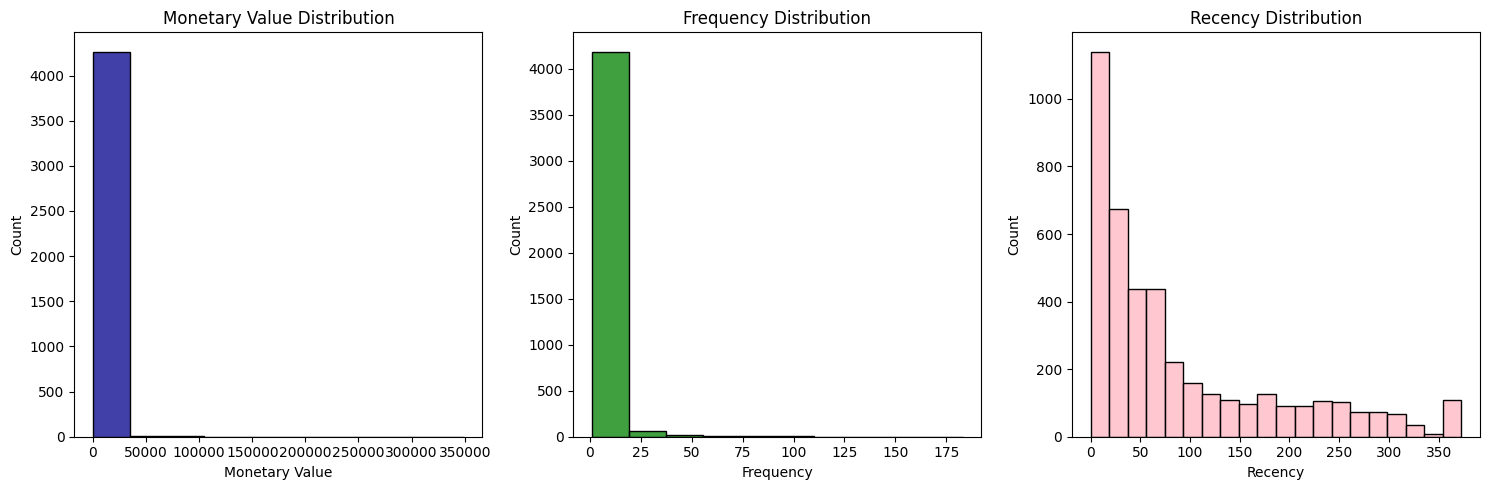

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(aggregated_df['MonetaryValue'], bins=10, color='darkblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.histplot(aggregated_df['Frequency'], bins=10, color='green', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.histplot(aggregated_df['Recency'], bins=20, color='lightpink', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

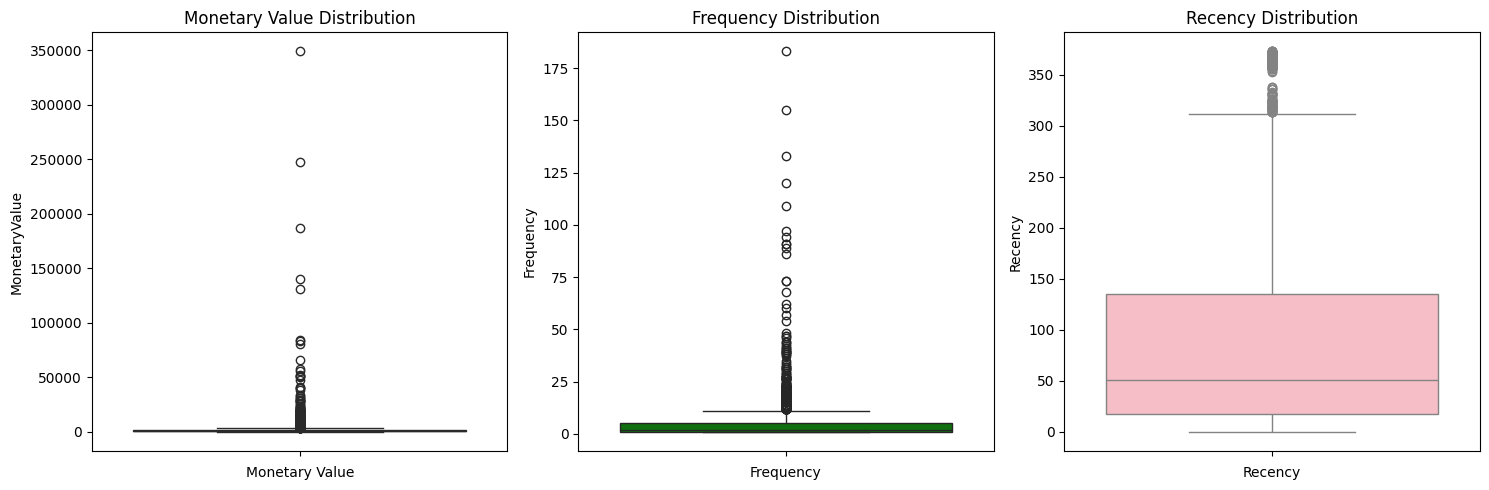

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='darkblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='green')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='lightpink')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [ ]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] < M_Q1 - 1.5 * M_IQR) | (aggregated_df['MonetaryValue'] > M_Q3 + 1.5 * M_IQR)].copy()
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,421.00,421.00,421.00,421,421.00
mean,15079.77,12198.21,17.16,2010-11-09 13:16:23.087886080,30.00
min,12357.00,3788.21,1.00,2009-12-10 18:03:00,0.00
25%,13599.00,4590.53,8.00,2010-11-08 14:14:00,3.00
50%,14936.00,6171.07,12.00,2010-11-26 12:19:00,13.00
75%,16656.00,10300.98,18.00,2010-12-06 10:03:00,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1723.92,25886.95,19.77,NaN,51.61


In [ ]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] < F_Q1 - 1.5 * F_IQR) | (aggregated_df['Frequency'] > F_Q3 + 1.5 * F_IQR)].copy()
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14374.12,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1091.44,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4328.44,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11652.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31383.98,21.93,NaN,26.59


In [ ]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3810.00,3810.00,3810.00,3810,3810.00
mean,15378.29,880.96,2.87,2010-09-03 11:26:19.795275776,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13913.50,277.40,1.00,2010-07-08 15:37:30,22.00
50%,15390.50,581.12,2.00,2010-10-12 16:05:30,58.00
75%,16856.75,1256.62,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3786.70,11.00,2010-12-09 20:01:00,373.00
std,1693.11,815.59,2.25,NaN,98.10


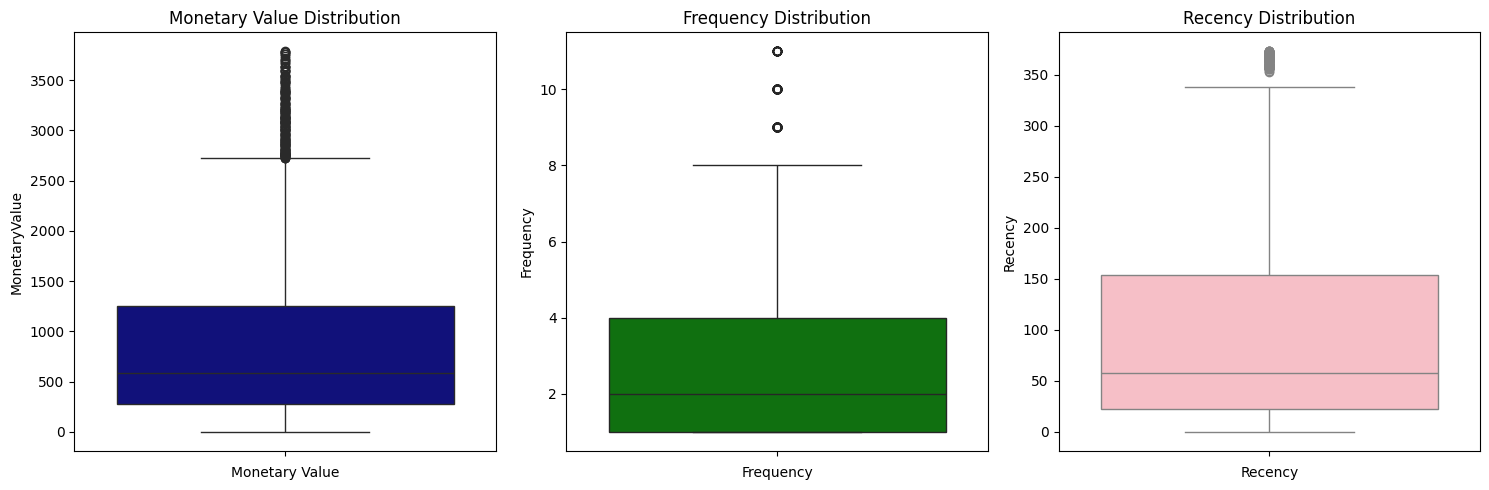

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='darkblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='green')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='lightpink')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

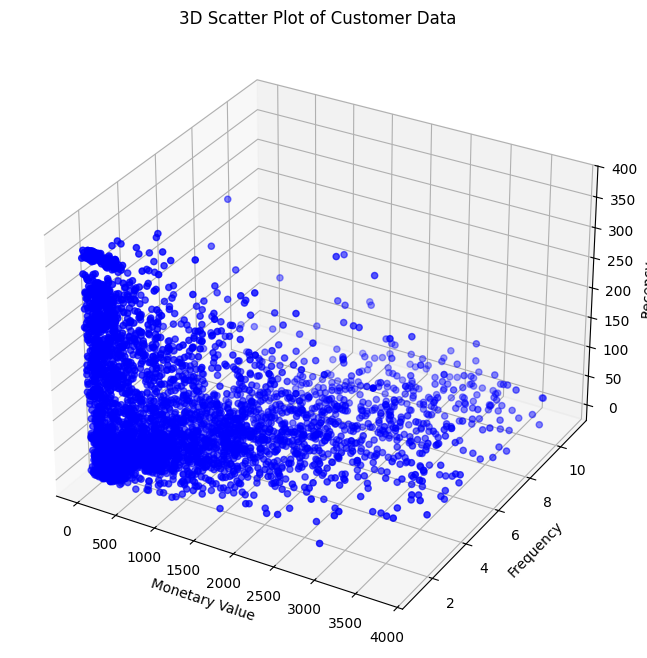

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c='blue')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.title('3D Scatter Plot of Customer Data')
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])
scaled_data

array([[-0.87261704, -0.38523967,  0.68229934],
       [ 0.54244637, -0.38523967, -0.96930272],
       [-0.8090964 , -0.83055615, -0.24545244],
       ...,
       [-0.6179949 , -0.83055615,  2.01785409],
       [ 0.44815868, -0.38523967,  0.14196039],
       [ 1.73485643,  0.5053933 , -0.81637661]])

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=['MonetaryValue', 'Frequency', 'Recency'])
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.87,-0.39,0.68
1,0.54,-0.39,-0.97
2,-0.81,-0.83,-0.25
3,1.64,-0.39,-0.56
4,-0.71,-0.83,-0.89
...,...,...,...
4280,-0.32,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.45,-0.39,0.14


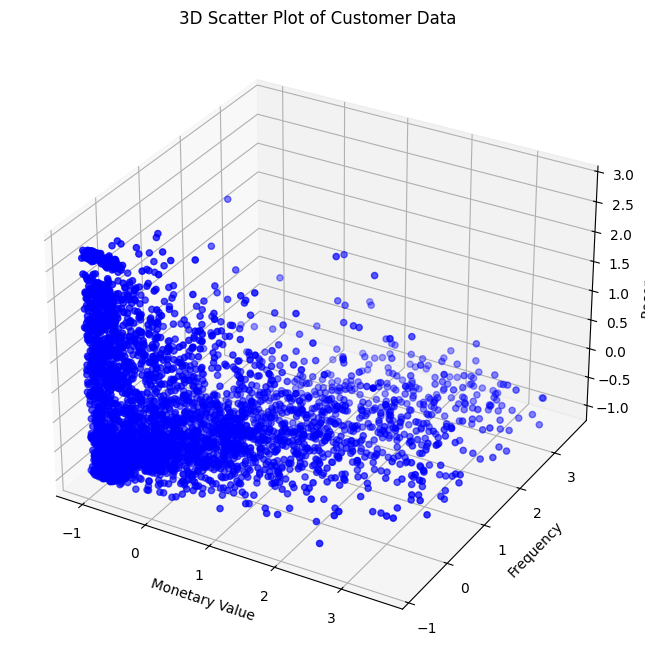

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'], c='blue')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.title('3D Scatter Plot of Customer Data')
plt.show()

## K-means Clustering

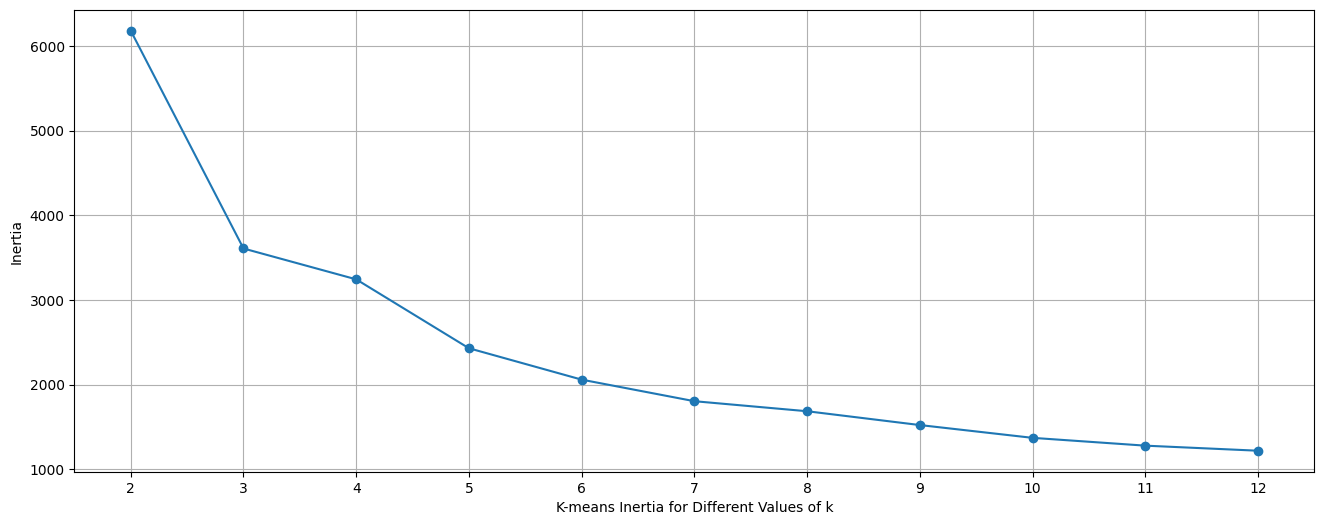

In [ ]:
max_k = 12
inertia = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('K-means Inertia for Different Values of k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

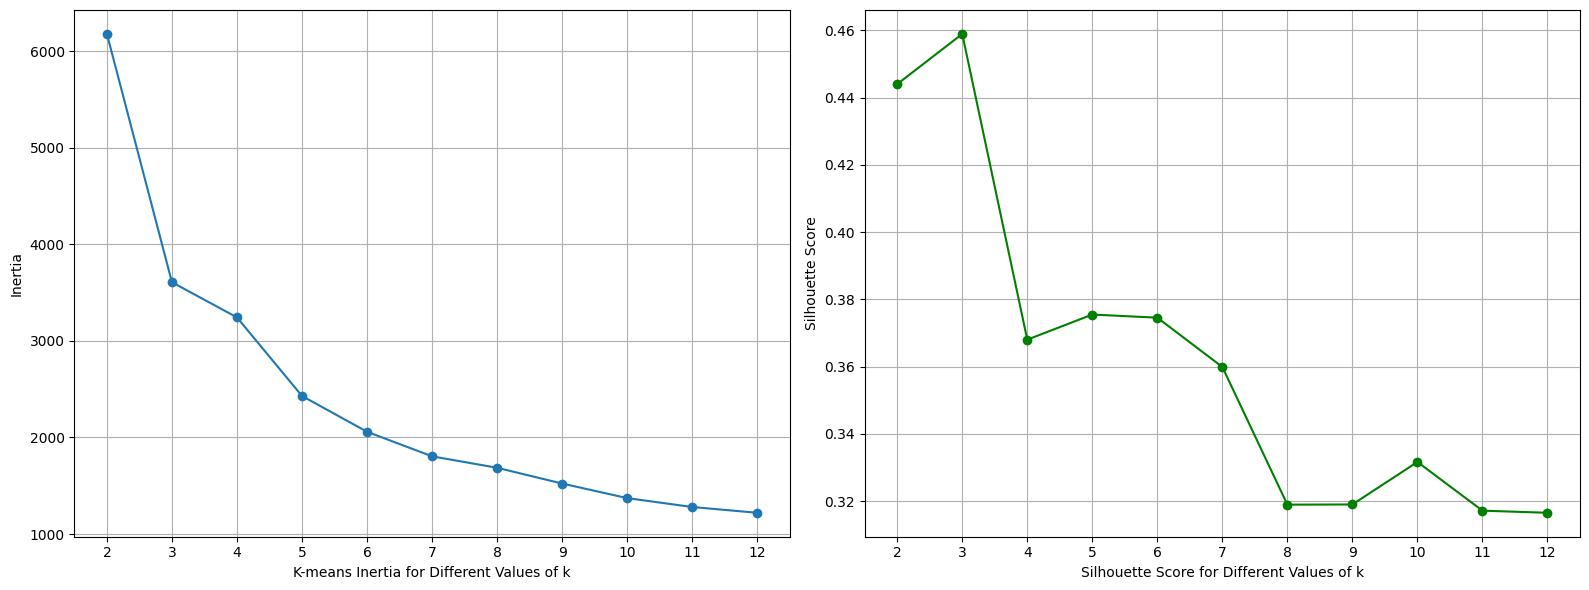

In [ ]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('K-means Inertia for Different Values of k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='g')
plt.xlabel('Silhouette Score for Different Values of k')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([3, 0, 0, ..., 1, 0, 2], dtype=int32)

In [ ]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

<ipython-input-182-bc8467696719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,2
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0
...,...,...,...,...,...,...
4280,18283.00,619.37,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,0
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


In [ ]:
non_outliers_df.groupby("Cluster").agg({
    "MonetaryValue": "mean",
    "Frequency": "mean",
    "Recency": "mean",
    "Customer ID": "count"
})

,MonetaryValue,Frequency,Recency,Customer ID
Cluster,,,,
0,615.42,2.19,42.41,1834
1,312.55,1.24,301.00,465
2,2115.12,6.21,40.06,829
3,482.45,1.72,174.35,682


## Cluster Analysis

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
<ipython-input-184-a005922dc5ad>:18: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 4
  plt.legend(handles=scatter.legend_elements()[0], labels=cluster_colors.values())
<ipython-input-184-a005922dc5ad>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=scatter.legend_elements()[0], labels=cluster_colors.values())


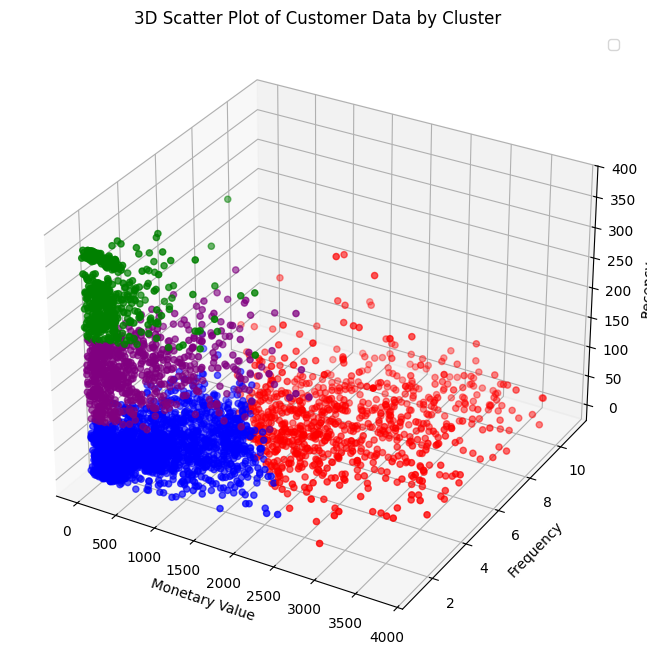

In [ ]:
cluster_colors = {
    0: 'blue',
    1: 'green',
    2: 'red',
    3: 'purple'
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c=colors, marker='o')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')
plt.legend(handles=scatter.legend_elements()[0], labels=cluster_colors.values())
plt.show()

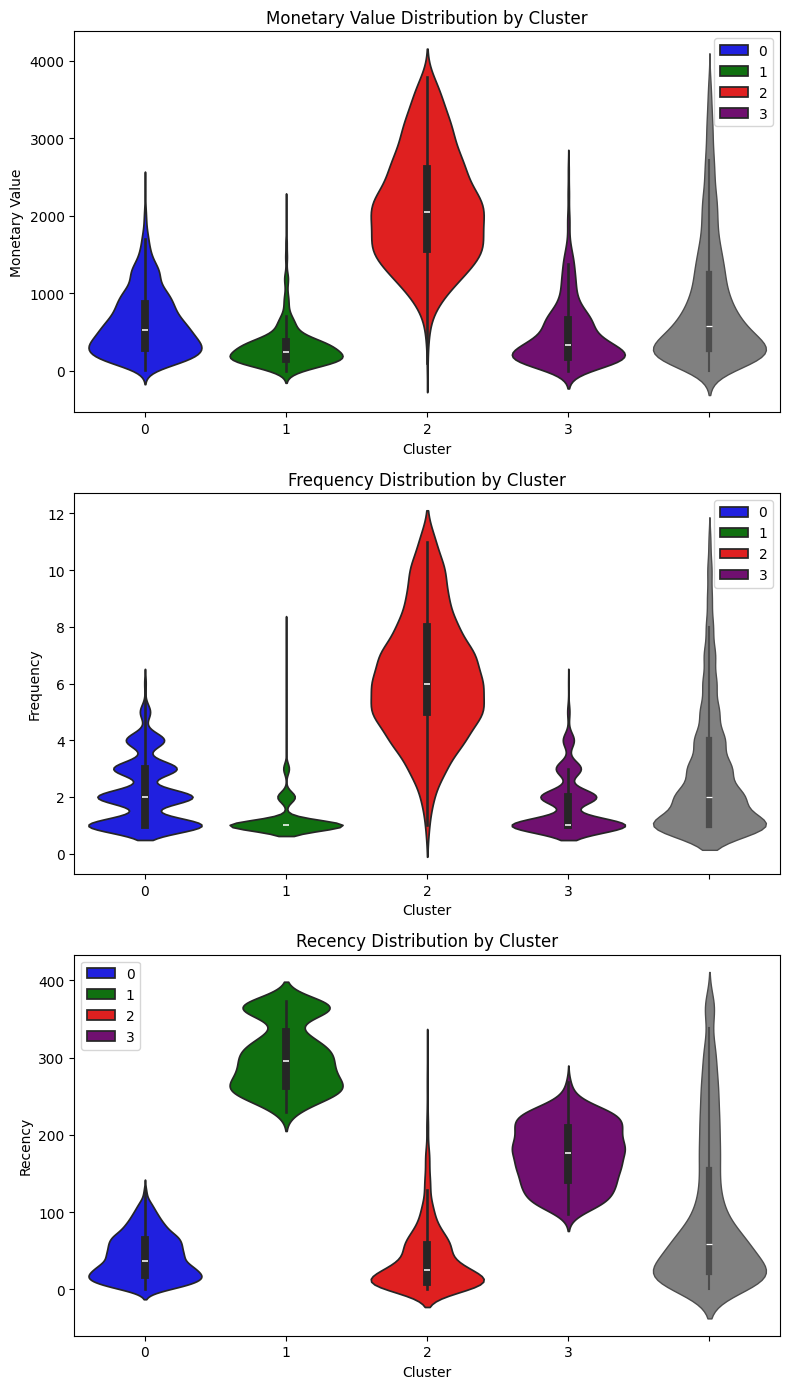

In [ ]:
plt.figure(figsize=(8, 14))

plt.subplot(3, 1, 1)
sns.violinplot(x='Cluster', y='MonetaryValue', data=non_outliers_df, palette=cluster_colors, hue='Cluster')
sns.violinplot(y='MonetaryValue', data=non_outliers_df, color='gray', linewidth=1.0)
plt.title('Monetary Value Distribution by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x='Cluster', y='Frequency', data=non_outliers_df, palette=cluster_colors, hue='Cluster')
sns.violinplot(y='Frequency', data=non_outliers_df, color='gray', linewidth=1.0)
plt.title('Frequency Distribution by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x='Cluster', y='Recency', data=non_outliers_df, palette=cluster_colors, hue='Cluster')
sns.violinplot(y='Recency', data=non_outliers_df, color='gray', linewidth=1.0)
plt.title('Recency Distribution by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

## Outlier Analysis

In [ ]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=225)

In [ ]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7539.84,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4776.50,23,2010-10-29 14:17:00,41,-3


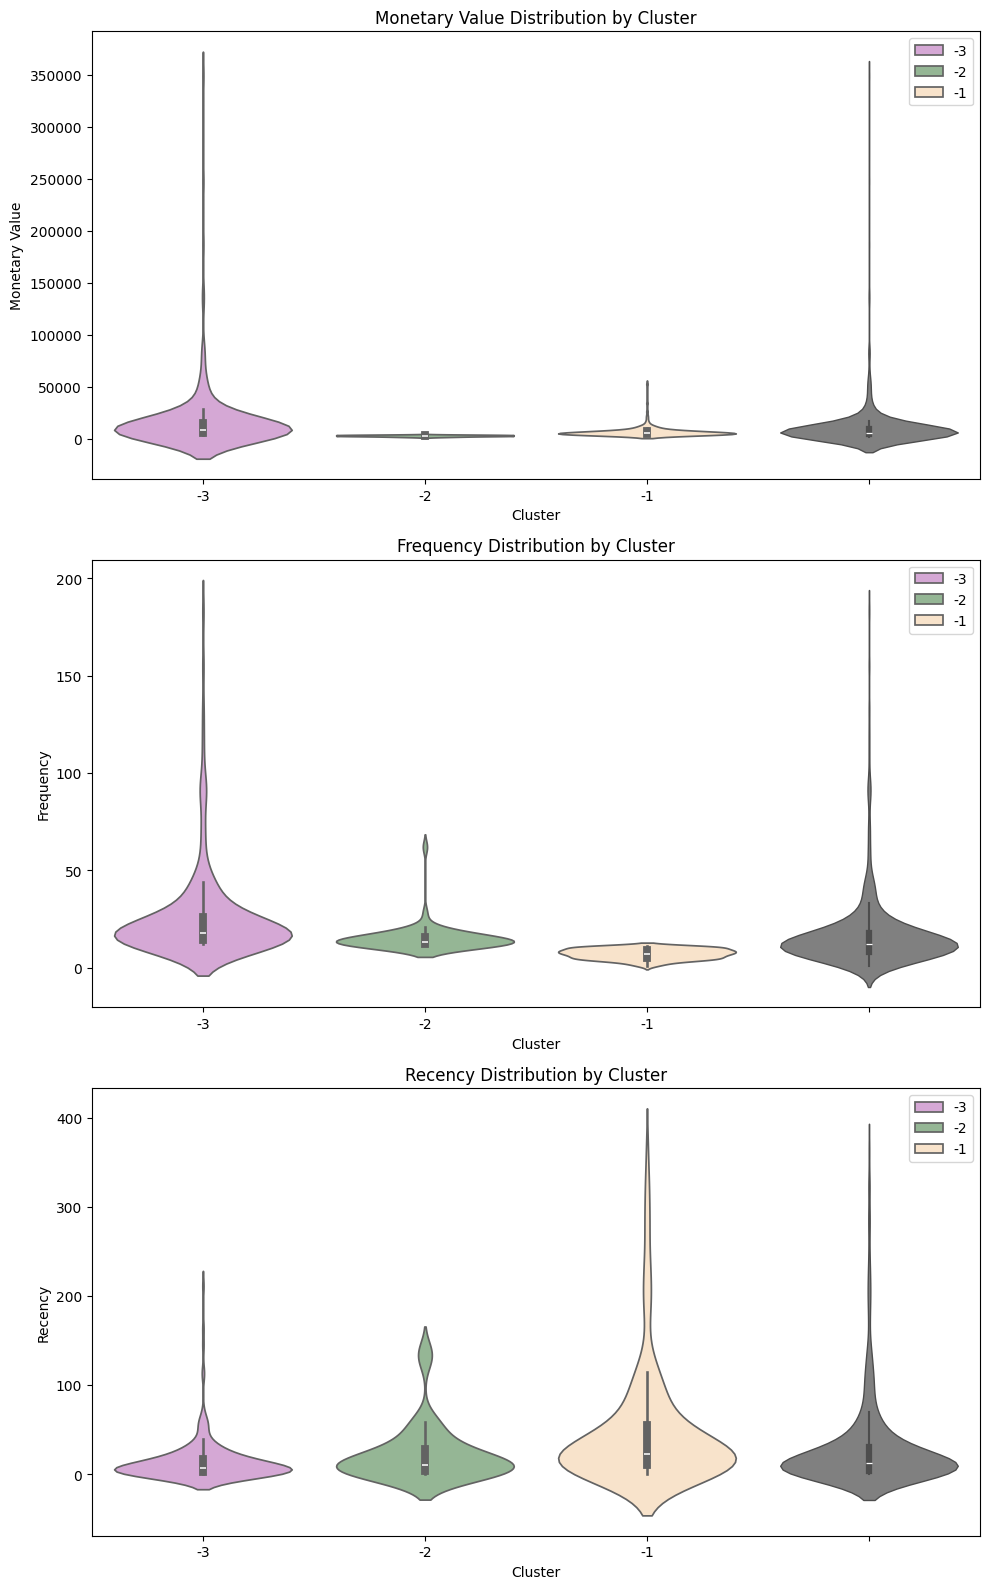

In [ ]:
cluster_colors = {
    -1: '#FFE4C4',
    -2: '#8FBC8F',
    -3: '#DDA0DD'
}

plt.figure(figsize=(10, 16))

plt.subplot(3, 1, 1)
sns.violinplot(x='Cluster', y='MonetaryValue', data=outlier_clusters_df, palette=cluster_colors, hue='Cluster')
sns.violinplot(y='MonetaryValue', data=outlier_clusters_df, color='gray', linewidth=1.0)
plt.title('Monetary Value Distribution by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x='Cluster', y='Frequency', data=outlier_clusters_df, palette=cluster_colors, hue='Cluster')
sns.violinplot(y='Frequency', data=outlier_clusters_df, color='gray', linewidth=1.0)
plt.title('Frequency Distribution by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x='Cluster', y='Recency', data=outlier_clusters_df, palette=cluster_colors, hue='Cluster')
sns.violinplot(y='Recency', data=outlier_clusters_df, color='gray', linewidth=1.0)
plt.title('Recency Distribution by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

In [ ]:
cluster_labels = {
    0: 'RETAIN' ,
    1: 'REACTIVATE' ,
    2: 'REWARD' ,
    3: 'NURTURE' ,
    -1: 'REINFORCE',
    -2: 'RECOVER',
    -3: 'GROW'
}

In [ ]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,2
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7539.84,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4776.50,23,2010-10-29 14:17:00,41,-3


In [ ]:
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_labels)
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3,NURTURE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0,RETAIN
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,2,REWARD
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0,RETAIN
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,GROW
4236,18225.00,7539.84,15,2010-12-09 15:46:00,0,-3,GROW
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,GROW
4241,18231.00,4776.50,23,2010-10-29 14:17:00,41,-3,GROW


## Visualization

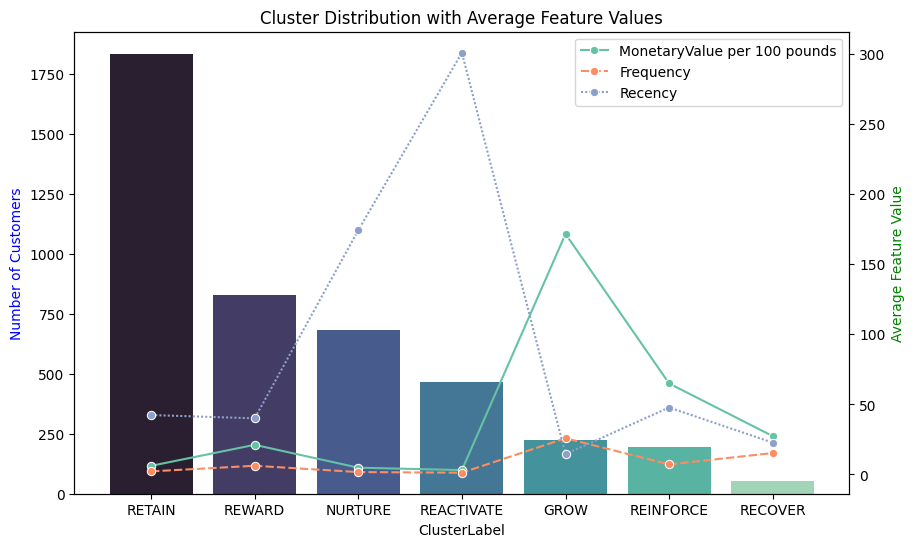

In [ ]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df['MonetaryValue per 100 pounds'] = full_clustering_df['MonetaryValue'] / 100
feature_means = full_clustering_df.groupby('ClusterLabel')[['MonetaryValue per 100 pounds', 'Frequency', 'Recency']].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='mako', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Feature Value', color='g')

plt.show()